# IMDB 5000 movie metadata

We will start by loading the dataset into a pandas dataframe, and inspect the attributes of the first entry

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # Principal component analysis
from sklearn.preprocessing import StandardScaler # to standardize the data

df = {}
df['raw'] = pd.read_csv("./data/movie_metadata.csv")


# 1. A description of the data set. (Jakob)

### Problem of interest 

The data consists of 28 attributes, regarded as meta data of movies.

### Where the dataset was obtained

The dataset was provided by kaggle.com<br>
After obtaining the dataset, it has been removed due to a DMCA complaint, and replaced with an alternative dataset.
This project is not compatible with the new dataset.

### What have previously been done to the data

The data has been scraped from the IMDB web site, using a python script.
The data has not been pre-proccesed, which means we will expect some NaN values.

### Aim and relevant attributes

Our aim is to do a classification, to predict what score a movie will get on IMDB.
We also want to do a linear regresion of the gross of a movie.<br>
To consider which attributes are relevant, we will print out the first movie, and look at what attributes will be relevant.

In [2]:
print(df['raw'].iloc[0])

color                                                                    Color
director_name                                                    James Cameron
num_critic_for_reviews                                                     723
duration                                                                   178
director_facebook_likes                                                      0
actor_3_facebook_likes                                                     855
actor_2_name                                                  Joel David Moore
actor_1_facebook_likes                                                    1000
gross                                                              7.60506e+08
genres                                         Action|Adventure|Fantasy|Sci-Fi
actor_1_name                                                       CCH Pounder
movie_title                                                            Avatar 
num_voted_users                                     

From this data, we will chose to focus on numerical data.<br> We do this, partly because we feel some of the categorical data is better explained by the numerical data, I.E. wether or not the instructor is James cameron or not, might not be as relevant as measuring the popularity of a director through facebook likes.
This might not be true for categories like genre, but we hope to build a more simple model of prediction, by limiting the prediction to numerical data.

# 2. Detailed explanation of the attributes(Mattias)
This dataset consists of 28 different attributes and they together hold information about a movie.

## Attribute description
A detailed explination of the attributes is shown in the table below. Where each attribute can be discrete or continous, and each attributes' objects are of different types.
<br>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-amwm{font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-yw4l{vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-amwm">Attribute</th>
    <th class="tg-amwm">Description</th>
    <th class="tg-amwm">Discrete/Continous</th>
    <th class="tg-amwm">Type of attribute</th>
  </tr>
  <tr>
    <td class="tg-yw4l">movie_title</td>
    <td class="tg-yw4l">Holds title of the movie.</td>
    <td class="tg-baqh">Discrete</td>
    <td class="tg-baqh">Nominal</td>
  </tr>
  <tr>
    <td class="tg-yw4l">director_name</td>
    <td class="tg-yw4l">Name of director of the movie.</td>
    <td class="tg-baqh">Discrete</td>
    <td class="tg-baqh">Nominal</td>
  </tr>
  <tr>
    <td class="tg-yw4l">color</td>
    <td class="tg-yw4l">Shown in color or black and white.</td>
    <td class="tg-baqh">Discrete</td>
    <td class="tg-baqh">Nominal</td>
  </tr>
  <tr>
    <td class="tg-yw4l">duration</td>
    <td class="tg-yw4l">Duration of the movie in minutes.</td>
    <td class="tg-baqh">Discrete</td>
    <td class="tg-baqh">Ratio</td>
  </tr>
  <tr>
    <td class="tg-yw4l">actor_1_name</td>
    <td class="tg-yw4l">Name of lead actor.</td>
    <td class="tg-baqh">Discrete</td>
    <td class="tg-baqh">Nominal</td>
  </tr>
  <tr>
    <td class="tg-yw4l">actor_2_name</td>
    <td class="tg-yw4l">Name of second actor.</td>
    <td class="tg-baqh">Discrete</td>
    <td class="tg-baqh">Nominal</td>
  </tr>
  <tr>
    <td class="tg-yw4l">actor_3_name</td>
    <td class="tg-yw4l">Name of third actor.</td>
    <td class="tg-baqh">Discrete</td>
    <td class="tg-baqh">Nominal</td>
  </tr>
  <tr>
    <td class="tg-yw4l">title_year</td>
    <td class="tg-yw4l">Year of release.</td>
    <td class="tg-baqh">Discrete</td>
    <td class="tg-baqh">Interval</td>
  </tr>
  <tr>
    <td class="tg-yw4l">genres</td>
    <td class="tg-yw4l">Genres the movie belongs to.</td>
    <td class="tg-baqh">Discrete</td>
    <td class="tg-baqh">Nominal</td>
  </tr>
  <tr>
    <td class="tg-yw4l">aspect_ratio</td>
    <td class="tg-yw4l">Aspect ratio</td>
    <td class="tg-baqh">Discrete</td>
    <td class="tg-baqh">Nominal</td>
  </tr>
  <tr>
    <td class="tg-yw4l">facenumber_in_poster</td>
    <td class="tg-yw4l">Number of faces shown in movie poster.</td>
    <td class="tg-baqh">Discrete</td>
    <td class="tg-baqh">Ratio</td>
  </tr>
  <tr>
    <td class="tg-yw4l">language</td>
    <td class="tg-yw4l">Language spoken in the movie.</td>
    <td class="tg-baqh">Discrete</td>
    <td class="tg-baqh">Nominal</td>
  </tr>
  <tr>
    <td class="tg-yw4l">country</td>
    <td class="tg-yw4l">Country where the movie is filmed.</td>
    <td class="tg-baqh">Discrete</td>
    <td class="tg-baqh">Nominal</td>
  </tr>
  <tr>
    <td class="tg-yw4l">budget</td>
    <td class="tg-yw4l">Cost of the movie.</td>
    <td class="tg-baqh">Continous</td>
    <td class="tg-baqh">Ratio</td>
  </tr>
  <tr>
    <td class="tg-yw4l">gross</td>
    <td class="tg-yw4l">Income of the movie.</td>
    <td class="tg-baqh">Continous</td>
    <td class="tg-baqh">Ratio</td>
  </tr>
  <tr>
    <td class="tg-yw4l">movie_facebook_likes</td>
    <td class="tg-yw4l">Count of facebook likes for the movie.</td>
    <td class="tg-baqh">Discrete</td>
    <td class="tg-baqh">Ratio</td>
  </tr>
  <tr>
    <td class="tg-yw4l">director_facebook_likes</td>
    <td class="tg-yw4l">Count of facebook likes the director has.</td>
    <td class="tg-baqh">Discrete</td>
    <td class="tg-baqh">Ratio</td>
  </tr>
  <tr>
    <td class="tg-yw4l">actor_1_facebook_likes</td>
    <td class="tg-yw4l">Facebook likes actor 1 has.</td>
    <td class="tg-baqh">Discrete</td>
    <td class="tg-baqh">Ratio</td>
  </tr>
  <tr>
    <td class="tg-yw4l">actor_2_facebook_likes</td>
    <td class="tg-yw4l">Facebook likes actor 2 has.</td>
    <td class="tg-baqh">Discrete</td>
    <td class="tg-baqh">Ratio</td>
  </tr>
  <tr>
    <td class="tg-yw4l">actor_3_facebook_likes</td>
    <td class="tg-yw4l">Facebook likes actor 3 has.</td>
    <td class="tg-baqh">Discrete</td>
    <td class="tg-baqh">Ratio</td>
  </tr>
  <tr>
    <td class="tg-yw4l">cast_total_facebook_likes</td>
    <td class="tg-yw4l">Total facebook likes for the whole cast of the movie.</td>
    <td class="tg-baqh">Discrete</td>
    <td class="tg-baqh">Ratio</td>
  </tr>
  <tr>
    <td class="tg-yw4l">plot_keywords</td>
    <td class="tg-yw4l">Keywords describing the movie.</td>
    <td class="tg-baqh">Discrete</td>
    <td class="tg-baqh">Nominal</td>
  </tr>
  <tr>
    <td class="tg-yw4l">content_rating</td>
    <td class="tg-yw4l">Rating of the movie.</td>
    <td class="tg-baqh">Discrete</td>
    <td class="tg-baqh">Nominal</td>
  </tr>
  <tr>
    <td class="tg-yw4l">num_user_for_reviews</td>
    <td class="tg-yw4l">Number of users who wrote reviews.</td>
    <td class="tg-baqh">Discrete</td>
    <td class="tg-baqh">Ratio</td>
  </tr>
  <tr>
    <td class="tg-yw4l">num_critic_for_reviews</td>
    <td class="tg-yw4l">Number of critics who wrote reviews.</td>
    <td class="tg-baqh">Discrete</td>
    <td class="tg-baqh">Ratio</td>
  </tr>
  <tr>
    <td class="tg-yw4l">num_voted_users</td>
    <td class="tg-yw4l">Count of users who have voted the movie.</td>
    <td class="tg-baqh">Discrete</td>
    <td class="tg-baqh">Ratio</td>
  </tr>
  <tr>
    <td class="tg-yw4l">movie_imdb_link</td>
    <td class="tg-yw4l">Holds a link to the movie on the site imdb.</td>
    <td class="tg-baqh">Discrete</td>
    <td class="tg-baqh">Nominal</td>
  </tr>
  <tr>
    <td class="tg-yw4l">imdb_score</td>
    <td class="tg-yw4l">Movie score on IMDB.</td>
    <td class="tg-baqh">Continous</td>
    <td class="tg-baqh">Ordinal</td>
  </tr>
</table>

## Summary statistics
A summary over the different attributes of the dataset.

In [3]:
df['no_nan'] = df['raw'].dropna() # The NA values are not considered in the summary statistics of the attributes
df['no_nan'].describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3.756000e+03,3.756000e+03,3756.000000,3756.000000,3756.000000,3.756000e+03,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000
mean,167.378328,110.257987,807.336528,771.279553,7751.338658,5.261282e+07,1.058267e+05,11527.101970,1.377263,336.843184,4.623685e+07,2002.976571,2021.775825,6.465282,2.111014,9353.829340
std,123.452040,22.646717,3068.171683,1894.249869,15519.339621,7.031787e+07,1.520354e+05,19122.176905,2.041541,411.227368,2.260103e+08,9.888108,4544.908236,1.056247,0.353068,21462.889123
min,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.000000,4.000000,2.180000e+02,1927.000000,0.000000,1.600000,1.180000,0.000000
25%,77.000000,96.000000,11.000000,194.000000,745.000000,8.270233e+06,1.966700e+04,1919.750000,0.000000,110.000000,1.000000e+07,1999.000000,384.750000,5.900000,1.850000,0.000000
50%,138.500000,106.000000,64.000000,436.000000,1000.000000,3.009311e+07,5.397350e+04,4059.500000,1.000000,210.000000,2.500000e+07,2004.000000,685.500000,6.600000,2.350000,227.000000
75%,224.000000,120.000000,235.000000,691.000000,13000.000000,6.688194e+07,1.286020e+05,16240.000000,2.000000,398.250000,5.000000e+07,2010.000000,976.000000,7.200000,2.350000,11000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


# 3. data visualization(Jakob) and PCA(Mattias)

Before we start, we will take alle the numeric data of the dataset, and drop the lines with NA.
We drop the lines, because it is assumed the web scrapper made an error while scraping for the movie.

In [4]:
df['numeric'] = df['raw']._get_numeric_data()
df['numeric'] = df['numeric'].dropna()
df['numeric_std'] = (df['numeric'] - df['numeric'].mean())/df['numeric'].std()
print(100-(df['raw'].shape[0]-df['numeric'].shape[0])/df['raw'].shape[0],"% of the dataset remain, after dropping NA's")

99.75371802498513 % of the dataset remain, after dropping NA's


## Boxplot
We will use boxplots, to investigete wether or not the dataset contains outliers

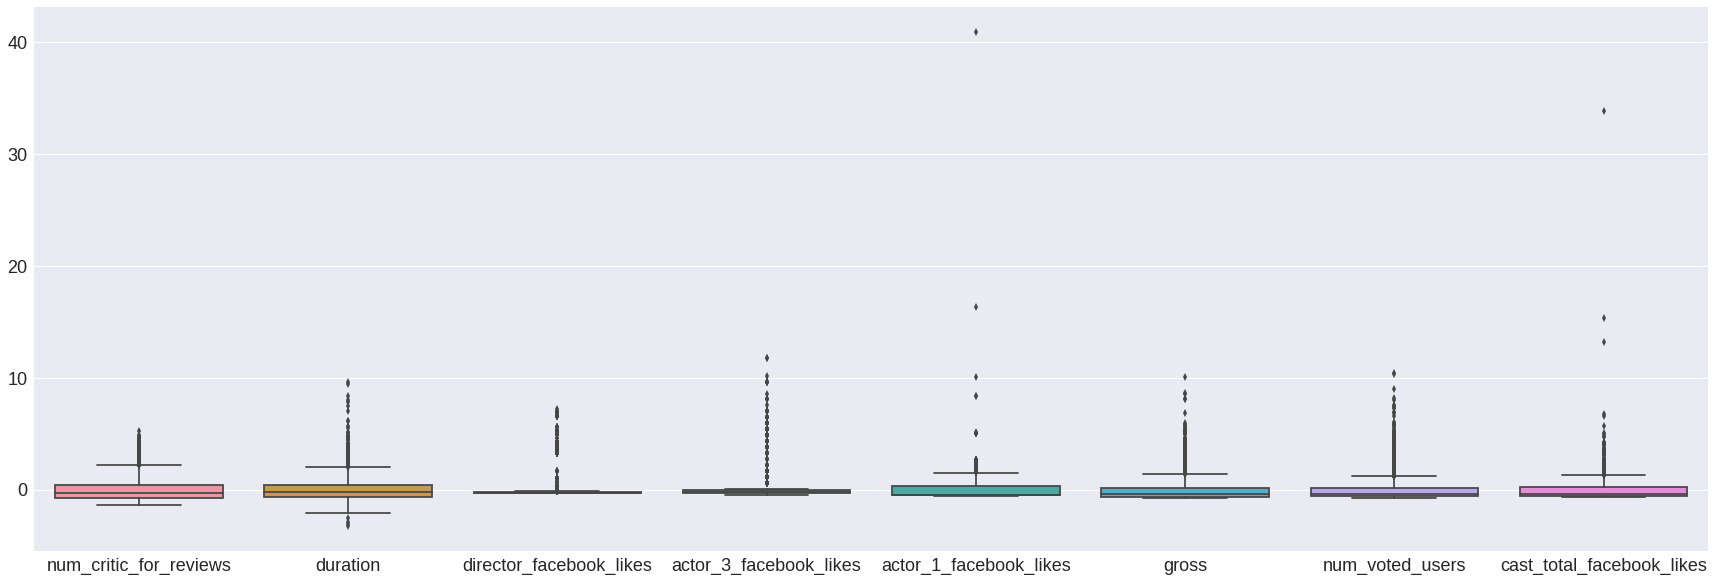

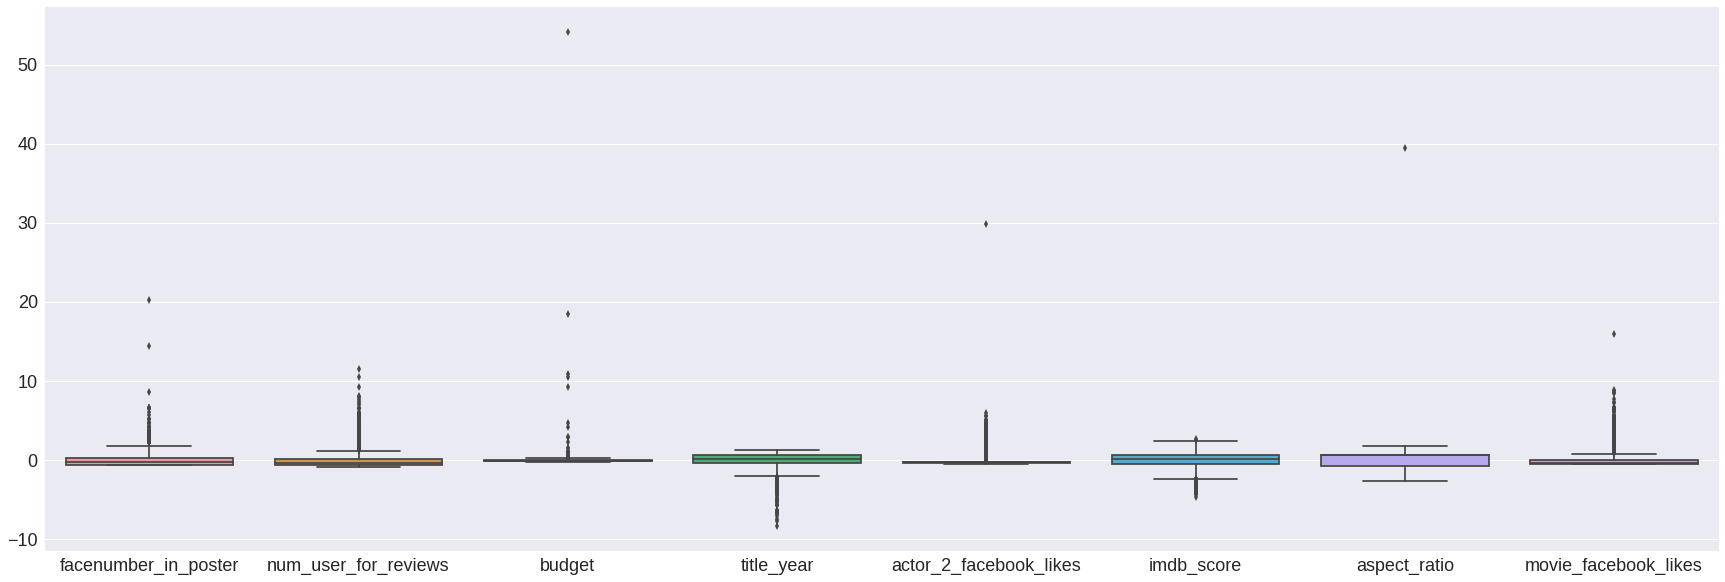

In [5]:
%matplotlib inline
plt.figure(figsize=(30,10))
sns.boxplot(data = df['numeric_std'].iloc[:,:8]);
plt.tick_params(labelsize=18)

plt.figure(figsize=(30,10))
sns.boxplot(data = df['numeric_std'].iloc[:,8:]);
plt.tick_params(labelsize=18)

## Histogram

The boxplot tells us that all the attributes contain outliers. These will have to be removed from the dataset, before plotting the histograms, to give a meaningfull insight as to wether or not the attributes are normally distributed.

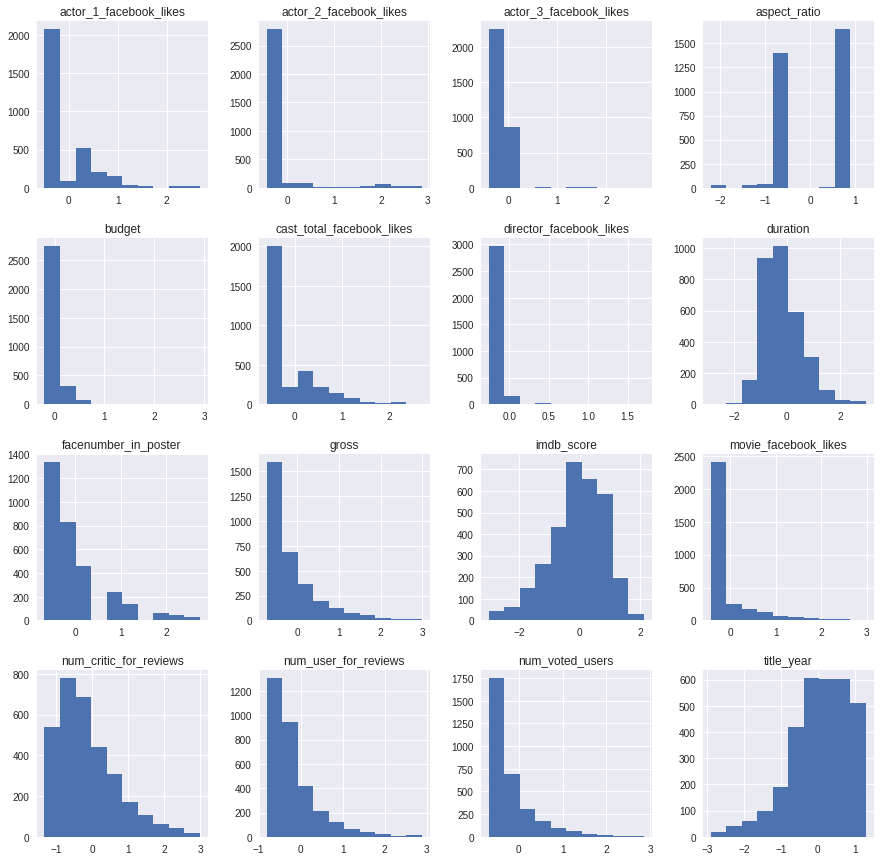

In [6]:
from scipy import stats
df['no_outliers'] = df['numeric_std'][(np.abs(stats.zscore(df['numeric_std'])) < 3).all(axis=1)]
df['no_outliers'].hist(figsize=(15,15));

From the histograms, it is clear that only IMDB_score and duration is somewhere normally distributed.
IMDB_score seemes to be a little left-skewed, which tells us that most movies are good movies, while not so many bad movies are included.
Duration on the other hand, seems to be slightly right hand-skewed, which tells us that only a few movies are considered long.

## Heatmap
We will use a heatmap, to investigate what attributes correlate with each other.

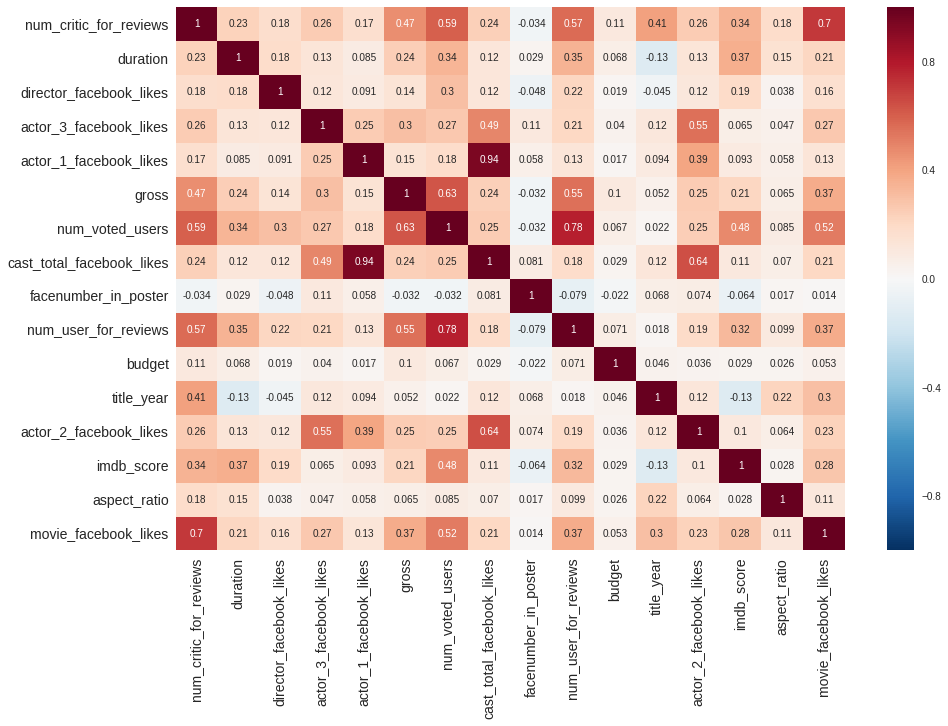

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(df['numeric'].corr(),annot=True);
plt.tick_params(labelsize=14)

From the heatmap, we can identify correlation on the dataset to be:<br>
num_user_for_reviews & num_voted_users (medium)<br>
num_critics_for_reviews & movie_facebook_likes (low)<br>
actor_1_facebook_likes & cast_total_facebook_likes (high)<br><br>
We will now choose a minimum value for the attributes, and see if that changes the correlation.<br>
Facebook likes (generel): 100<br>
reviews (generel): 10<br>
votes: 100

In [8]:
df['heatmap'] = df['numeric'][['num_user_for_reviews','num_voted_users',
                               'num_critic_for_reviews','movie_facebook_likes',
                               'actor_1_facebook_likes', 'cast_total_facebook_likes']]
df['heatmap'] = df['heatmap'][(df['heatmap']['num_user_for_reviews'] > 10) & 
                              (df['heatmap']['num_critic_for_reviews'] > 10) &
                              (df['heatmap']['num_voted_users'] > 100) &
                              (df['heatmap']['movie_facebook_likes'] > 100) &
                              (df['heatmap']['actor_1_facebook_likes'] > 100) &
                              (df['heatmap']['cast_total_facebook_likes'] > 100)]
print("This removes",((df['numeric'].shape[0]-df['heatmap'].shape[0])*100)/df['numeric'].shape[0],"% of the data, leaving",df['heatmap'].shape[0],"rows.")

This removes 49.72375690607735 % of the data, leaving 1911 rows.


By setting these conditions, we removed nearly half of the dataset. This is far from perfect, and could be done more efficently. We choose to try and map the correlation, to get an undertanding of wether or not this approach changes anything.

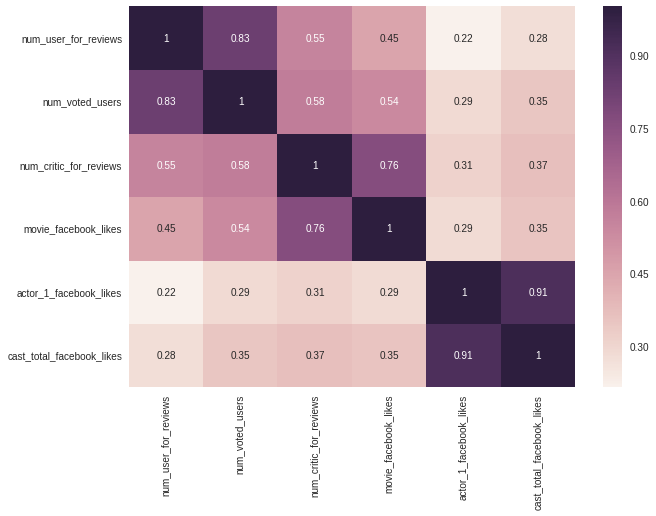

In [9]:
plt.figure(figsize=(10,7))
sns.heatmap(df['heatmap'].corr(),annot=True);
plt.tick_params(labelsize=10)

From the new heatmap, it is clear that the correlation is nearly the same.
As expected the correlation has generally increased, except for actor 1 vs cast facebook likes, which has decreased. The increased correlation dosent seem to be of a significant magnitude.

## Eigendecomposition
The data is preprocessed, where the eigenvectors and eigenvalues are found with an eigendecomposition of the covariance matrix.

### Covariance between features
To be able to perform an eigendecomposition to find the eigenvalues and eigenvectors, we first need to find the covariance between the features.

In [10]:
mean_vector = np.mean(df['numeric_std'], axis=0)
#cov_matrix = (df['numeric_std'] - mean_vector).T.dot((df['numeric_std'] - mean_vector)) / (df['numeric_std'].shape[0]-1)
cov_matrix = np.cov(df['numeric_std'].T)
print('Covariance matrix: \n', cov_matrix)

Covariance matrix: 
 [[ 1.          0.2277051   0.17691581  0.25508576  0.17019757  0.46853499
   0.59498973  0.24100544 -0.03400866  0.56679514  0.10568105  0.41038049
   0.25583672  0.34388077  0.18064082  0.70396936]
 [ 0.2277051   1.          0.179734    0.12577123  0.08471988  0.24474304
   0.33803814  0.12117142  0.02909973  0.35039147  0.06816122 -0.12942203
   0.12945227  0.36612369  0.15311429  0.2149361 ]
 [ 0.17691581  0.179734    1.          0.11824025  0.09073261  0.13993814
   0.30061915  0.11974122 -0.04761895  0.21831138  0.01855931 -0.04460636
   0.11690032  0.19083814  0.03787106  0.16273728]
 [ 0.25508576  0.12577123  0.11824025  1.          0.25372024  0.30158391
   0.26945536  0.49068631  0.10501768  0.20732096  0.04047813  0.11553537
   0.55418237  0.06497354  0.04712336  0.27251268]
 [ 0.17019757  0.08471988  0.09073261  0.25372024  1.          0.14704475
   0.18226526  0.94492526  0.05757968  0.12522139  0.01708638  0.09374233
   0.39267587  0.09313142  0.057603

### Eigenvalues and eigenvectors
Now the eigendecomposition of the covariance matrix can be performed.

In [11]:
eigen_val, eigen_vec = np.linalg.eig(cov_matrix)
print('Eigenvalues: \n', eigen_val)
print('Eigenvectors: \n', eigen_vec)

Eigenvalues: 
 [  4.44580470e+00   2.13638826e+00   1.49676251e+00   1.77127604e-03
   1.49832592e-01   2.45489846e-01   4.15713572e-01   4.43199530e-01
   4.83090305e-01   5.91155511e-01   7.81093607e-01   1.05104702e+00
   1.01385279e+00   9.95797015e-01   8.65920555e-01   8.83080919e-01]
Eigenvectors: 
 [[ -3.62354414e-01  -1.55231715e-01  -3.27054448e-01  -1.62025489e-03
   -3.31573710e-01  -7.50503288e-01  -4.12158468e-02  -1.16389036e-01
    3.65453280e-02  -2.97597990e-02   7.18269165e-02  -6.13156205e-02
    3.79048270e-02   8.15100857e-02  -1.64750964e-01  -5.31998566e-02]
 [ -2.06546689e-01  -1.77456956e-01   2.72900550e-01   1.78092632e-03
   -8.22090214e-02   2.24263723e-02   1.47776172e-03   6.83130523e-02
   -1.01618892e-01  -7.03489867e-01   2.49215267e-01   4.80791333e-01
   -6.11947994e-02  -1.57182288e-01   6.59324034e-02  -9.02684044e-02]
 [ -1.58008874e-01  -9.48378711e-02   2.08405953e-01  -6.38573426e-06
    5.74527147e-02  -4.97074269e-02  -3.18951662e-02   9.381

## Selecting principal components
The next step towards the goal of the Principal Component Analysis is to find the number of principal components to include in the analysis.

First the Eigenvalues and Eigenvectors are gathered in tuples.

In [12]:
eigen_pairs = [(np.abs(eigen_val[i]), eigen_vec[:,i]) for i in range(len(eigen_val))]

eigen_pairs.sort()
eigen_pairs.reverse()

print('Eigenvalues from highest to lowest:')
for eig_val in eigen_pairs:
    print(eig_val[0])

Eigenvalues from highest to lowest:
4.44580469646
2.1363882565
1.49676251129
1.05104701557
1.01385279214
0.995797014572
0.883080919082
0.86592055526
0.781093607224
0.591155511436
0.483090304644
0.443199530174
0.415713571524
0.245489846152
0.149832591928
0.00177127604066


### Explained variance
A plot is generated showing the explained variance.

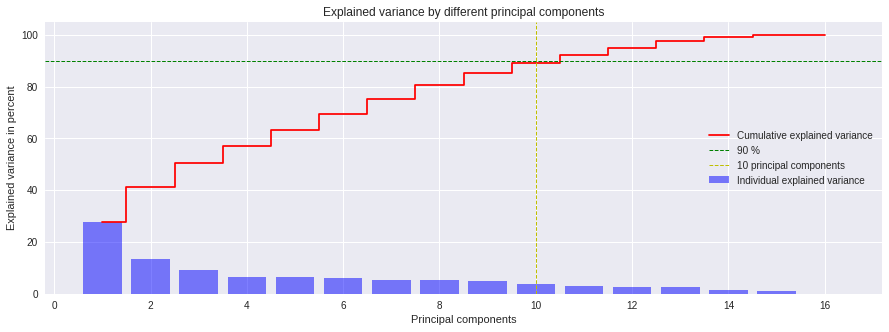

Explained variance with 10 principal components: 89.13064299709966 %


In [13]:
var_explained = [(i / sum(eigen_val))*100 for i in sorted(eigen_val, reverse=True)]
cum_var_explained = np.cumsum(var_explained)

plt.figure(figsize=(15,5))
plt.bar(range(1,17), var_explained, alpha=0.5, align='center', label='Individual explained variance', color='b')
plt.step(range(1,17), cum_var_explained, where='mid', label='Cumulative explained variance', color='r')
plt.axhline(y=90, linewidth=1, color='g', linestyle='dashed', label='90 %')
plt.axvline(x=10, linewidth=1, color='y', linestyle='dashed', label='10 principal components')
plt.title('Explained variance by different principal components')
plt.ylabel('Explained variance in percent')
plt.xlabel('Principal components')
plt.legend(loc='center right')
plt.show()

print('Explained variance with 10 principal components: {} %'.format(sum(var_explained[:10])))

## Data projection
The 16 principal components represent a 16 dimensional feature space. We can acheive 90 % of the explained variance by projecting 10 principal components onto a new feature space of 10 dimensions.

A projection matrix is constructed.

In [14]:
projection_mat = np.hstack((eigen_pairs[0][1].reshape(16,1),
                           eigen_pairs[1][1].reshape(16,1),
                           eigen_pairs[2][1].reshape(16,1),
                           eigen_pairs[3][1].reshape(16,1),
                           eigen_pairs[4][1].reshape(16,1),
                           eigen_pairs[5][1].reshape(16,1),
                           eigen_pairs[6][1].reshape(16,1),
                           eigen_pairs[7][1].reshape(16,1),
                           eigen_pairs[8][1].reshape(16,1),
                           eigen_pairs[9][1].reshape(16,1)))
print('New feature space: \n',projection_mat)

New feature space: 
 [[-0.36235441 -0.15523172 -0.32705445 -0.06131562  0.03790483  0.08151009
  -0.05319986 -0.16475096  0.07182692 -0.0297598 ]
 [-0.20654669 -0.17745696  0.27290055  0.48079133 -0.0611948  -0.15718229
  -0.0902684   0.0659324   0.24921527 -0.70348987]
 [-0.15800887 -0.09483787  0.20840595  0.12694943  0.12008483  0.16052085
   0.84322352 -0.25249877 -0.27309888 -0.03440345]
 [-0.25223678  0.27767529  0.00654394 -0.13872948 -0.28485919 -0.13536892
   0.2952517   0.31375067  0.34323303  0.07694933]
 [-0.22285236  0.46306437  0.16428681  0.0787905   0.28789749  0.11389636
  -0.26048233 -0.22988297 -0.26122059 -0.0759173 ]
 [-0.31777754 -0.13571665  0.0173335  -0.24850597 -0.10960705 -0.12600893
  -0.10533131  0.3152294  -0.29616364 -0.02403127]
 [-0.3852095  -0.24021723  0.0937219  -0.10266444 -0.06402271  0.03768662
  -0.06402336  0.03040115 -0.20253182  0.16375738]
 [-0.28454688  0.50536128  0.14815754  0.02354407  0.16453434  0.05408887
  -0.1272955  -0.08631673 -0.0